# Assignment 3-2

# Written by ChunChieh Tsai



- # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
    # At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- # Choose the significance threshold
- # Clearly state they Null and Alternate hypothesis
- # Wrangle the data so that it is ready for your analysis.

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import requests
import seaborn as sns

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2016


# IDEA:
## Women average ridding time is less than men average ridding time

# NULL HYPOTHESIS:
## Women riding time is more than or the same of Men riding time

# _$H_0$_ : $W_{\mathrm{duration}} >= M_{\mathrm{duration}}$
# _$H_1$_ : $W_{\mathrm{duration}} <  M_{\mathrm{duration}}$

## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I am starting with a single month of data:  reading data from citibike csv file from Jan 2015

what I want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". You can think of it as a python dictionary in many ways,but it has many added capabilities: it is easy to convert variables within it, it knows how to plot itself, etc.

### download and move  data to PUIDATA
# NOTE: 
# 1. access to data from within the notebook _is required_
# 2. if data is downloaded it _must_ be stored in a directory pointed to by the environmental variable PUIDATA

In [3]:
import requests, zipfile, io
r = requests.get("https://s3.amazonaws.com/tripdata/201307-201402-citibike-tripdata.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(os.getenv("PUIDATA"))

In [4]:
os.getenv("PUIDATA")

'/Users/JackTsai/PUI2017/PUIDATA'

In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + "2013-07 "+ '- Citi Bike trip data.csv')
# df is the dataframe where the content of the csv file is stored

# Count the duration of each rider

In [6]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
# Count the Duration of each rider
df["duration"] = df['stoptime'] - df['starttime']
df["duration_second"] = df[3:]['duration'] / np.timedelta64(1, 's')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration,duration_second
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0,00:10:34,NaN
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0,00:25:47,NaN
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2,00:02:58,NaN
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0,00:26:20,1580.0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1,00:12:37,757.0


# Count the age of riders

In [7]:
def count_age(yr):
    try:
        return 2017 - int(yr)
    except:
        return 0
    

In [8]:
df["Age"] = df["birth year"].apply(count_age)
df["Age"].dropna()
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration,duration_second,Age
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0,00:10:34,NaN,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0,00:25:47,NaN,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2,00:02:58,NaN,37
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0,00:26:20,1580.0,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1,00:12:37,757.0,31


In [9]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'duration', 'duration_second', 'Age'],
      dtype='object')

In [10]:
df.drop(["duration_second", 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',"duration","birth year"
       ], axis=1, inplace=True)

In [11]:
df.head()

,tripduration,gender,Age
0,634,0,0
1,1547,0,0
2,178,2,37
3,1580,0,0
4,757,1,31


### Lets separate males (_m) from females (_w) to test the hypotheses.
### In this csv file gender == 1 is male, gender == 2 is female

### Lets plot the number of trips per week day

In [12]:
map_dict = {1: "male", 2: "female", 0: "unknown"}
df['gender'] = df['gender'].map(map_dict)

In [13]:
df = df.dropna()
df.head()

,tripduration,gender,Age
0,634,unknown,0
1,1547,unknown,0
2,178,female,37
3,1580,unknown,0
4,757,male,31


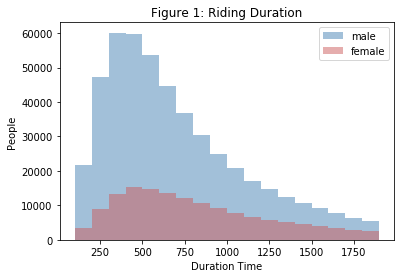

In [14]:
bins = [i*100 for i in range (1,20)]
#plt.hist(df["duration_second"],bins,label="Total")
df_male = df[df["gender"]=="male"]
df_female = df[df["gender"]=="female"]
#df_unknown = df[df["gender"]=="unknown"]
plt.hist(df_male["tripduration"],bins,label='male',color='SteelBlue',alpha=0.5)
#plt.hist(df_unknown["duration_second"],bins,label='unknown')
plt.hist(df_female["tripduration"],bins,label='female',color='IndianRed',alpha=0.5)

plt.title("Figure 1: Riding Duration")
plt.ylabel("People")
plt.xlabel("Duration Time")
pl.legend()

## Figure 1a: Distribution of Citibike bikers by gender in January 2015, absolute counts

In [16]:
count_by_gender = df.groupby([df.gender]).mean()

In [17]:
count_by_gender

,tripduration,Age
gender,,
female,983.239169,40.169376
male,821.258456,41.938406
unknown,1528.506668,0.018362


In [19]:
print ( "Average female trip duration",count_by_gender["tripduration"][0],"Average male trip duration",count_by_gender["tripduration"][1])

Average female trip duration 983.239169204 Average male trip duration 821.258456359


## Z test

In [20]:
mean_w = count_by_gender["tripduration"][0]
mean_m = count_by_gender["tripduration"][1]

std = np.std(df.tripduration)
z = (mean_w - mean_m)/(std/np.sqrt(len(df.tripduration)))

In [21]:
z

20.814859633360719

### the Null hold